## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading The File

In [2]:
data=pd.read_csv(r"C:\Users\Nishant\Downloads\advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Exploring The Dataset

In [3]:
data.shape   # Data has 200 rows and 4 columns

(200, 4)

In [4]:
data.info()  # It has only float type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe()   # median and mean are quite similar.

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
data.isnull().sum()   ## It has zero null values.

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
data.duplicated().sum() # No duplicates

0

## Checking for the Outliers

<AxesSubplot:>

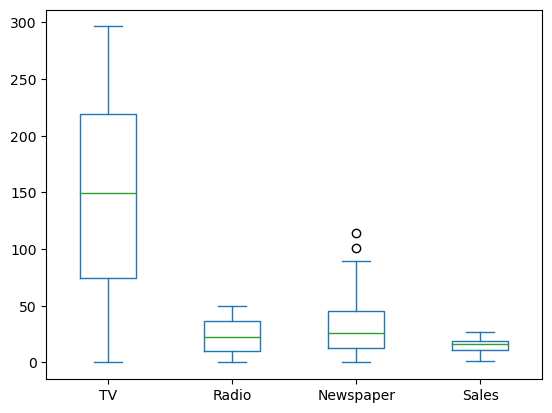

In [8]:
data.plot(kind='box')

In [9]:
## Only newspaper contain ouliers that too very few.

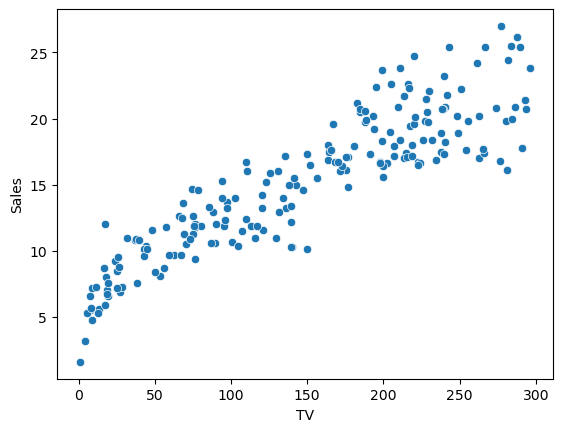

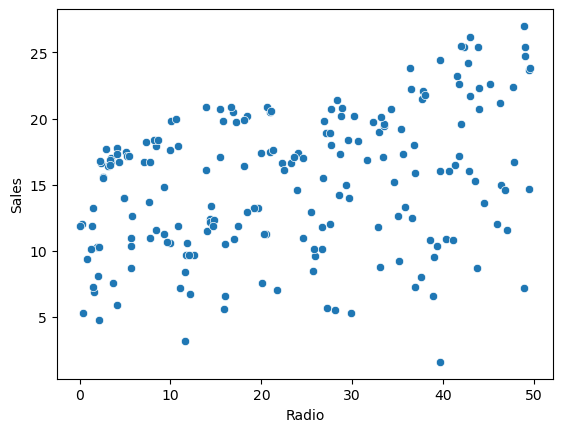

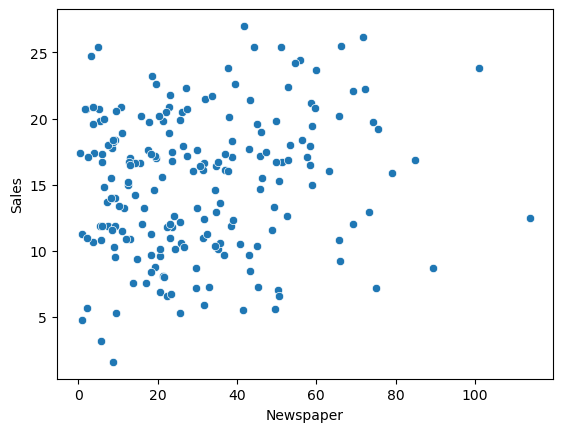

In [10]:
df=['TV','Radio','Newspaper']
for i in df:
    sns.scatterplot(x=data[i],y='Sales',data=data)
    plt.show()

In [11]:
## Tv shows strong corelation with sales while radio and Newspaper are not strongly correlated with each other.

<AxesSubplot:>

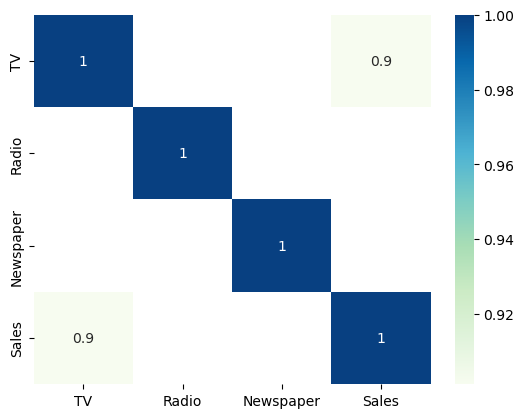

In [12]:
data_corr=data.corr()
data_corr_high=data_corr[abs(data_corr)>=0.5]
sns.heatmap(data_corr_high,annot=True,cmap='GnBu')

In [13]:
## we can drop radio and newspaper as they are not correlated to sales.

In [14]:
data_final=data.copy()

In [15]:
data_final.drop(['Radio','Newspaper'],axis=1,inplace=True)

In [16]:
data_final.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


## Splitting the data into train and test.

In [21]:
x=data_final[['TV']]
y=data_final[['Sales']]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [24]:
print('Shape of training data :',x_train.shape,y_train.shape)
print('Shape of testing data :',x_test.shape,y_test.shape)

Shape of training data : (160, 1) (160, 1)
Shape of testing data : (40, 1) (40, 1)


## Modelling

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr=LinearRegression()

In [27]:
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
print('The intercept is ',lr.intercept_)

The intercept is  [7.00710843]


In [31]:
print('The Slope is ', lr.coef_)

The Slope is  [[0.05548294]]


## Predictions

In [41]:
y_pred=lr.predict(x_test)
y_pred

array([[16.06747317],
       [17.84847567],
       [23.25806271],
       [ 7.65625887],
       [19.23000098],
       [11.17387752],
       [19.03581067],
       [ 9.78125562],
       [19.34651516],
       [16.72217191],
       [ 8.75482116],
       [10.12524988],
       [20.01785878],
       [ 7.30671633],
       [14.74697911],
       [16.45030549],
       [ 7.41213392],
       [17.97053815],
       [11.18497411],
       [20.17875932],
       [19.74044406],
       [10.76885203],
       [ 9.1154603 ],
       [20.92777906],
       [10.83543156],
       [ 9.97544593],
       [18.85271696],
       [14.73588252],
       [11.84522114],
       [ 7.47316516],
       [18.09260063],
       [10.84652815],
       [18.04266598],
       [ 7.94477018],
       [22.58117079],
       [20.22314567],
       [ 9.68693462],
       [22.19279018],
       [13.50970946],
       [ 8.53288939]])

# Evaluation

## Error on Training Data

In [37]:
lr.score(x_train,y_train)

0.8134866044709264

## Error on Testing Data

In [38]:
lr.score(x_test,y_test)

0.802561303423698

# MAPE

In [42]:
def MAPE(y,y_hat):
    return np.sum(np.abs(y-y_hat)/np.abs(y))*100/len(y)

In [43]:
MAPE(y_test,y_pred)

Sales    14.947498
dtype: float64

## R2 Score

In [44]:
from sklearn.metrics import r2_score

In [47]:
R2=r2_score(y_test,y_pred)
print('R2 score is :',R2)

R2 score is : 0.802561303423698


In [57]:
from sklearn import metrics

In [58]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1.9502948931650088
MSE: 6.101072906773964
RMSE: 2.470035001123256


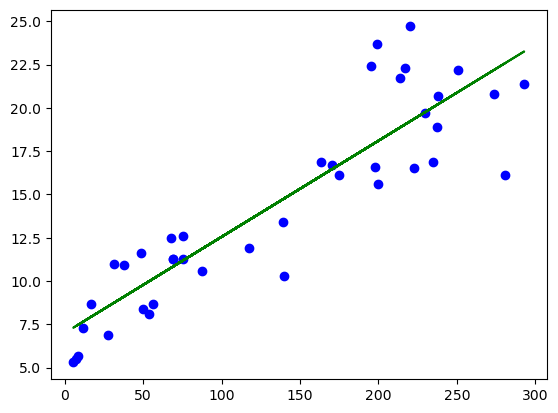

In [72]:
plt.scatter(x_test,y_test,color='b')
plt.plot(x_test,y_pred,color='g')
plt.show()